# Polynomial Regression

This notebook demonstrates a simple polynomial regression implementation.

## Visualize Input Data
First, a dataset is created and made of multiple examples with a single feature.

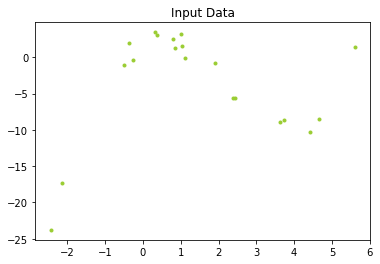

In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate a random dataset
m = 20 # number of samples
np.random.seed(0)
x = 2.5 * np.random.normal(0, 1, m)
y = x - 3 * (x ** 2) + 0.5 * (x ** 3) 
y += np.random.rand(m) * 5

# check the shape of the training data 
# x.shape is (n_samples, n_features=1)
# y.shape is (n_samples)

poly_degree = 5

# Show the dataset
plt.title('Input Data')
plt.scatter(x, y, color='yellowgreen', marker='.')

## Generate Model (Analytic)

Our hypothesis for a single example is $h(x)=\theta_{0} + \theta_{1}x + \theta_{2}x^2 + \dots + \theta_{n}x^n + \varepsilon$  and we are looking for a $\theta$ to minimize the model.

The matrix form for multiple examples is :

$$y=X \theta+\epsilon$$

where $X$ is the Vandermonde matrix of size(num_sample, poly_degree)

$$\begin{bmatrix}
y_{1}
\\ y_{2}
\\ \vdots
\\ y_{m}
\end{bmatrix} 
=
\begin{bmatrix}
1 & x_{1} & x_{1}^2 & \dots & x_{1}^n \\ 
1 & x_{2} & x_{2}^2 & \dots & x_{2}^n \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & x_{m} & x_{m}^2 & \vdots & x_{m}^n
\end{bmatrix}
\begin{bmatrix}
\theta_{1}
\\ \theta_{2}
\\ \vdots
\\ \theta_{n}
\end{bmatrix} 
+
\begin{bmatrix}
\epsilon_{1}
\\ \epsilon_{2}
\\ \vdots
\\ \epsilon_{m}
\end{bmatrix} $$

The solution is from the **normal equation**.

$$\theta = (X^{T}X)^{-1}.(X^{T}y)$$

In [2]:
# compute the parameters with the Normal Equation : inv(transpose(X).X).(transpose(X)y)
X = np.vander(x, poly_degree, increasing=True)
Xt = np.transpose(X)
thetas = np.linalg.pinv(np.dot(Xt, X)).dot(np.dot(Xt, y))

## Generate Model (Gradient Descent)

While gradient descent is **not** great with polynomial regression because it is not convex, lets give it a try ! 

We are using the mean squared error (MSE) over $m$ examples :

$$J(\theta_{0}, \theta_{1}, \dots, \theta_{n})= \frac{1}{2m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right )^2}$$


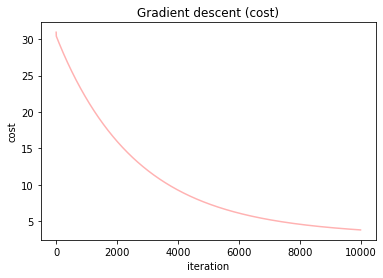

In [3]:
# vectorized implementation the equations above 
num_iterations = 10000
learning_rate = 0.00002
thetas = np.zeros(poly_degree)

# compute X
X = np.vander(x, poly_degree, increasing=True)

# gradient descent
stats = np.empty(num_iterations)
for i in range(num_iterations):
    # update parameters
    error = (np.dot(X, thetas) - y)
    for j in range(poly_degree):
        thetas[j] -= np.mean(error * X[:,j]) * learning_rate

    # store cost for future plotting
    new_error = (np.dot(X, thetas) - y)
    cost = np.dot(new_error, new_error) / (2*m)
    stats[i] = cost

plt.title('Gradient descent (cost)')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.plot(range(num_iterations),stats,'-r', alpha=0.3)

## Prediction

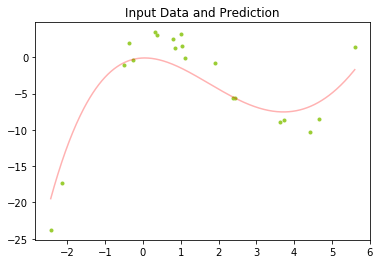

In [4]:
mn=np.min(x)
mx=np.max(x)
plot_x=np.linspace(mn,mx,500)
vander_x = np.vander(plot_x, poly_degree, increasing=True)
plot_y = np.dot(vander_x, thetas)

plt.scatter(x, y, color='yellowgreen', marker='.')
plt.title('Input Data and Prediction')
plt.plot(plot_x,plot_y,'-r', alpha=0.3)